<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/simpleImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
dataset = keras.datasets.fashion_mnist

In [6]:
dir(dataset)
# verb-> function
# noun-> properties

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [7]:
data = dataset.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [12]:
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [13]:
len(data)

2

In [14]:
a,b = data

In [15]:
len(a), len(b)

(2, 2)

In [17]:
a[1]

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
b[1]

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [19]:
(trainx, trainy),(testx,testy) = data

In [25]:
dir(data)
print(len(testy))

10000


In [26]:
len(trainx)

60000

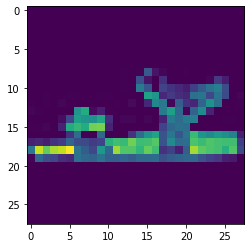

In [31]:
import matplotlib.pyplot as plt
i1 = trainx[59999]
plt.figure()
plt.imshow(i1)

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# BGR

T-shirt/top
(28, 28)


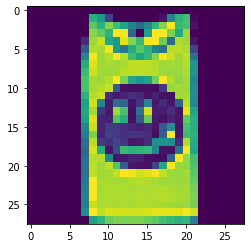

In [46]:
x=101
i1 = trainx[x]
print(class_names[trainy[x]])
print(trainx[x].shape)
plt.figure()
plt.imshow(i1)

In [39]:
trainx[0].shape

(28, 28)

In [41]:
trainx[101]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 160, 138,  52,   0,   0,
          0,   0,   0,   0,  14, 116, 166, 179,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 190, 164, 207, 176, 151,
        111,  88, 120, 169, 208, 255, 174, 181,  13,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 210, 194, 166, 254, 251,
         87,   0, 148, 254, 255, 204, 155, 216,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  33, 218, 235, 153, 135, 243,
        208, 173, 252, 255, 198,  85, 225, 218,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 226, 222, 250, 136,  98,
        158, 188, 166, 115,  95, 227, 229, 223,  52,   0,   0,   0,   0,
          0,   0],
       [  

In [42]:
# MinMax->(X-min)/(Max-min)-> (X-0)/(255-0) -> X/255
# ALl these values-> will become between 0 to 1
# similar scale-> not very large or very small!!

In [43]:
trainx_norm = trainx/255.0
testx_norm = testx/255.0

T-shirt/top
(28, 28)


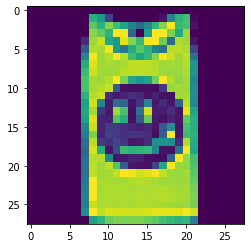

In [44]:
x=101
i1 = trainx_norm[x]
print(class_names[trainy[x]])
print(trainx_norm[x].shape)
plt.figure()
plt.imshow(i1)

In [47]:
layer1 = keras.layers.Flatten(input_shape=(28,28))
layer2 = keras.layers.Dense(128)
layer3 = keras.layers.Dense(256)
layer_final = keras.layers.Dense(10, activation=tf.nn.softmax)

In [48]:
m1 = keras.Sequential([layer1,layer2,layer3,layer_final])

In [49]:
m1.compile(loss=tf.losses.sparse_categorical_crossentropy, 
           optimizer=tf.optimizers.Adam(), 
           metrics=['accuracy'])


# momentum is welcome in networks
# vectors-> displacement -> d(displacement)/dt-> velocity
# dv/dt -> acceleration-> Ada
# da/dt -> jerk-> momentum -> Adam

In [50]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Transfer Learning-> ResNET, VGG, YOLO, AlexNet... 

In [52]:
history = m1.fit(trainx_norm, trainy, batch_size=32, epochs=50,
                 verbose=1)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5570 - accuracy: 0.8052
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4761 - accuracy: 0.8346
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4559 - accuracy: 0.8405
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4462 - accuracy: 0.8439
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4377 - accuracy: 0.8468
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4311 - accuracy: 0.8485
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4270 - accuracy: 0.8509
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4210 - accuracy: 0.8521
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4188 - accuracy: 0.8543
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.412

In [94]:
l1 = keras.layers.Flatten(input_shape=(28,28))
l2 = keras.layers.Dense(128, activation=tf.nn.relu)
l3 = keras.layers.Dense(256, activation = tf.nn.relu)
l4 = keras.layers.Dropout(0.1)
l_final = keras.layers.Dense(10, activation=tf.nn.softmax)
m2 = keras.Sequential([l1,l2,l3,l4,l_final])
m2.compile(loss=tf.losses.sparse_categorical_crossentropy, 
           optimizer=tf.optimizers.Adam(), 
           metrics=['accuracy'])

In [95]:
althistory = m2.fit(trainx_norm, trainy, batch_size=32, epochs=50,
                 verbose=1)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4889 - accuracy: 0.8242
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3647 - accuracy: 0.8653
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3321 - accuracy: 0.8788
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8876
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2915 - accuracy: 0.8914
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2744 - accuracy: 0.8968
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9021
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9055
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9090
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.232

In [55]:
predictions1 = m1.predict(testx_norm)

In [96]:
predictions2 = m2.predict(testx_norm)

In [97]:
e1 = m1.evaluate(trainx_norm, trainy)
e2 = m2.evaluate(trainx_norm, trainy)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0849 - accuracy: 0.9666


In [98]:
e1 = m1.evaluate(testx_norm, testy)
e2 = m2.evaluate(testx_norm, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.6286 - accuracy: 0.8873


In [60]:
e1

[0.47514858841896057, 0.8342000246047974]

In [61]:
e2

[0.7189953923225403, 0.8906999826431274]

In [99]:
from sklearn.model_selection import cross_val_score
d1 = testx_norm[0:2000]
d2 = testx_norm[2000:4000]
d3 = testx_norm[4000:6000]
d4 = testx_norm[6000:8000]
d5 = testx_norm[8000:10000]

In [100]:
y1 = testy[0:2000]
y2 = testy[2000:4000]
y3 = testy[4000:6000]
y4 = testy[6000:8000]
y5 = testy[8000:10000]

In [101]:
o1 = m1.predict(d1)
o2 = m1.predict(d2)
o3 = m1.predict(d3)
o4 = m1.predict(d4)
o5 = m1.predict(d5)

In [102]:
import numpy as np

In [103]:
print(np.argmax(o1[0]))
np.argmax(o1[0])

9


9

In [68]:
y1[0]

9

In [104]:
i = [d1 , d2, d3,d4,d5]
ys = [y1,y2,y3,y4,y5]
for indx,j in enumerate(i):
  # j is representing dataset
  predictions = m1.evaluate(j,ys[indx])
  print(predictions)

63/63 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8435
[0.438419371843338, 0.843500018119812]
63/63 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.8225
[0.506036639213562, 0.8224999904632568]
63/63 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8250
[0.5156300663948059, 0.824999988079071]
63/63 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8405
[0.45573005080223083, 0.840499997138977]
63/63 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8395
[0.45992666482925415, 0.8395000100135803]


In [105]:

for indx,j in enumerate(i):
  # j is representing dataset
  predictions = m2.evaluate(j,ys[indx])
  print(predictions)

63/63 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8925
[0.5331732630729675, 0.8924999833106995]
63/63 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.8805
[0.7292160391807556, 0.8805000185966492]
63/63 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.8715
[0.7268208265304565, 0.8715000152587891]
63/63 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.8920
[0.5707588791847229, 0.8920000195503235]
63/63 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.9000
[0.5831519961357117, 0.8999999761581421]


In [ ]:
# Regularization-> LR-> 0, loss->0
# L1/L2